TICA and clustering with CN- of 80:20 KA sims
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from collections import Counter
import mdtraj as md
#from CN_functions import *
#from gen_dtraj_functions import *

Some useful inhouse functions
------

In [4]:
#from plot_functions import *
import pickle

Read in the data
------

In [5]:
tica_lags = [1] 
tica_dim = 3
clust_dim = 3
nclust_max = 1000
dtraj = np.genfromtxt('dtraj_tica3D.dat')
# Y = []
# tica_corr = []
# for lag in tica_lags:
#     Y.append(np.load('../TICA/Y_ticadim-'+str(tica_dim)+'_ticalag-'+str(lag)+'.npy'))
#     tica_corr.append(np.load('../TICA/tica_corr_lag-'+str(lag)+'.npy'))
    #  clustering
    #with open('../TICA/clustering_regspaceB_ticadim-'+str(tica_dim)+'_ticalag-'+str(lag)+'_nclust-'+str(nclust_max)+'_clustdim-'+str(clust_dim)+'.pkl', 'rb') as f:
    #    clustering = pickle.load(f)
#Y_pca = np.load('Y_B_nclust-200_pcadim-10_clustdim-3.npy')

In [6]:
np.save('tica_lag',tica_lags[0])
np.save('tica_dim',tica_dim)
np.save('clust_dim',clust_dim)
np.save('nclust_max',nclust_max)

In [7]:
microstates = np.genfromtxt('microstates')

In [8]:
# from copy import deepcopy
# tica_lag = 1 #tica_lags[0]
# N_dim = Y[0][0].shape[1]
# Y_trim = []
# for traj in range(len(Y[0])):
#     Y_trim.append( Y[0][traj][::tica_lag,0:N_dim] )

In [9]:
np.unique(microstates).shape

(7,)

In [10]:
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )

/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


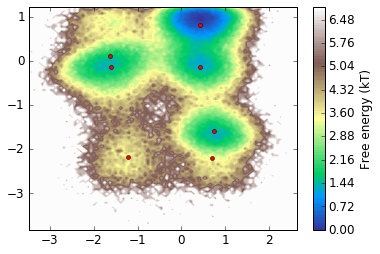

In [11]:
for lag in range(len(tica_lags)):
    for dim in range(clust_dim-1):
        fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,dim+1],cmap='terrain')
        for state in range(len(np.unique(microstates))):
            plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
#             plt.xlim([-1,1])
#             plt.ylim([-1,1])
        if dim == 0:
            plt.savefig('fig_bond-bond.eps', format='eps', dpi=800)
        else:
            plt.savefig('fig_bond-angle.eps', format='eps', dpi=800)
        # plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
        plt.show()

In [12]:
len(np.unique(microstates))
np.unique(microstates).astype(int)

array([   1,   19,   28,   38, 2462, 5687, 5703])

In [13]:
# Q_cut = [0.100,0.200,0.500,0.750]
# for cut in Q_cut:
#     print 'cut is '+str(cut)
#     microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
#     print 'nclust = '+str(np.unique(microstates).shape[0])
#     #
#     state_pos = [[] for dim in range(clust_dim)]
#     for state in np.unique(microstates):
#         state_frames = np.where(microstates==state)[0]
#         for dim in range(clust_dim):
#             state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
#     dim = 0
#     for lag in range(len(tica_lags)):
#         fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
#         for state in range(len(np.unique(microstates))):
#             #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
#             plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=15, color='red',alpha=0.5) #, markerfacecolor='none')

#     #         plt.xlim([0.2,0.6])
#     #         plt.ylim([-1.5,-0.5])
#     plt.show()

In [14]:
# Let's see what these clusters correspond to

In [15]:
# dtrajs = []
# path = '../traj/vals.txt'
# dtrajs.append(np.genfromtxt(path)[:,1:])

In [16]:
# concat the trajs
# dtrajs_concat = np.vstack(dtrajs)

In [17]:
# use the highest res rep
# cut = 0.100
# microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
microstates = np.genfromtxt('microstates')

In [18]:
clust_num_OLD = np.unique(microstates).astype(int)
clust_num_OLD

array([   1,   19,   28,   38, 2462, 5687, 5703])

In [19]:
from copy import deepcopy
microstates_renum = deepcopy(microstates)
for state_ind,state in enumerate(clust_num_OLD):
    states = np.where(microstates==state)[0]
    microstates_renum[states] = state_ind

In [20]:
#np.savetxt('mpp_traj_'+"{0:.3f}".format(cut)+'_renum.dat',microstates_renum.astype(int),fmt='%d')
np.savetxt('microstates_renum.dat',microstates_renum.astype(int),fmt='%d')

In [21]:
np.unique(microstates_renum)

array([0., 1., 2., 3., 4., 5., 6.])

In [22]:
mu = np.genfromtxt('mu.dat')
sd = np.genfromtxt('sd.dat')

In [23]:
#! dtraj is already shifted
# from copy import deepcopy
# dtraj_shift = deepcopy(dtraj)
# for traj in range(len(dtraj)):
#     dtraj_shift[traj] = (dtraj[traj]-mu)/sd

In [24]:
mu_state = []
sd_state = []
for state in np.unique(microstates_renum).astype(int):
    state_frs = np.where(microstates_renum==state)[0]
    mu_state.append(np.mean(dtraj[state_frs],axis=0))
    sd_state.append(np.sqrt(np.var(dtraj[state_frs],axis=0)))

In [25]:
print np.array(mu_state)
print np.array(state_pos).T

[[ 0.43361435  0.41907365  0.80901971]
 [ 0.74735854  0.7399951  -1.58416381]
 [-1.6069323   0.40236633 -0.12811426]
 [ 0.4286465  -1.64964863 -0.1320485 ]
 [-1.63390764 -1.67379778  0.10056133]
 [-1.22701061  0.75928196 -2.1851101 ]
 [ 0.71131288 -1.28096659 -2.19549884]]
[[ 0.43361435  0.41907365  0.80901971]
 [ 0.74735854  0.7399951  -1.58416381]
 [-1.6069323   0.40236633 -0.12811426]
 [ 0.4286465  -1.64964863 -0.1320485 ]
 [-1.63390764 -1.67379778  0.10056133]
 [-1.22701061  0.75928196 -2.1851101 ]
 [ 0.71131288 -1.28096659 -2.19549884]]


In [57]:
np.savetxt('sd_state.txt',np.mean(sd_state,axis=1),fmt='%f')

In [59]:
sd.astype(float)

array([1.1895000e-02, 1.1760000e-02, 1.9080745e+01])

In [31]:
for state in np.unique(microstates_renum).astype(int):
    state_frs = np.where(microstates_renum==state)[0]
    print len(state_frs) / float(len(microstates))

0.445411891393
0.136176704356
0.162849011614
0.153665102684
0.0522575186524
0.0252877983745
0.0243519729252


In [32]:
N_feat = dtraj.shape[1]
print N_feat
N_clust = len(np.unique(microstates))
print N_clust

3
7


In [33]:
feat_dist = [[] for state in range(N_clust)]
for state_ind,state in enumerate(np.unique(microstates)):
    state_frs = np.where(microstates==state)[0]
    for feat_ind in range(N_feat):
        feat_dist[state_ind].append(dtraj[state_frs,feat_ind])
feat_dist = np.array(feat_dist)

In [34]:
# sort the clusters in order of the first TICA component
import operator
state_pos = []
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    state_pos.append( np.mean( dtraj[:,0][state_frames] ) )

state_prop = []
for state_ind,state in enumerate(np.unique(microstates).astype(int)):
    state_prop.append([])
    state_prop[state_ind].append(state_pos[state_ind])
    state_prop[state_ind].append(state_ind)
sorted_list = sorted(state_prop, key=operator.itemgetter(0), reverse=False)
state_map = np.array(sorted_list)[:,-1].astype(int)
state_map_r = np.zeros(state_map.shape[0]).astype(int)
for state_ind,state in enumerate(np.unique(microstates).astype(int)):
    state_map_r[state_ind] = np.where(state_map==state_ind)[0]
# models = np.array(models)[model_map]
# model_nm = np.array(model_nm)[model_map]
# models_float = np.array(models_float)[model_map]
# print models
# print model_nm
# print models_float
#models_float
print state_map_r
np.save('state_map_r',state_map_r)
np.save('state_map',state_map)

[4 6 1 3 0 2 5]


In [35]:
# define the color schemes for the mss_sets
from matplotlib.pyplot import *
mycmap = plt.cm.rainbow
mss_colors = []
mycmap_max = N_clust
mycmap_min = 0
# extract all colors from the map
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
# create the new map
mycmap = mycmap.from_list('Custom cmap', mycmaplist, mycmap.N)
# define the bins and normalize
bounds = np.linspace(mycmap_min,mycmap_max,mycmap.N)
norm = matplotlib.colors.BoundaryNorm(bounds, mycmap.N)
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
dx = bounds[1] - bounds[0]
mss_colors = []
for state in range(N_clust):
    grid = int( (state - mycmap_min)/dx + 0.5 )
    mss_colors.append(mycmaplist[grid])

In [36]:
# print 'cut is '+str(cut)
#microstates = np.genfromtxt('mpp_traj_'+"{0:.3f}".format(cut)+'.dat')
microstates = np.genfromtxt('microstates')
print 'nclust = '+str(np.unique(microstates).shape[0])
#
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
dim = 0
for lag in range(len(tica_lags)):
    fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
    for state in range(len(np.unique(microstates))):
        #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
        plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=15, color=mss_colors[state],alpha=0.5) #, markerfacecolor='none')
        ax.annotate(state, (state_pos[0][state]-0.06,state_pos[dim+1][state]-0.06))

#         plt.xlim([0.2,0.6])
#         plt.ylim([-1.5,-0.5])
plt.show()

nclust = 7


nclust = 7


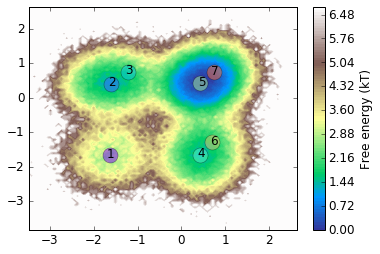

In [37]:
print 'nclust = '+str(np.unique(microstates).shape[0])
#
state_pos = [[] for dim in range(clust_dim)]
for state in np.unique(microstates).astype(int):
    state_frames = np.where(microstates==state)[0]
    for dim in range(clust_dim):
        state_pos[dim].append( np.mean( dtraj[:,dim][state_frames] ) )
dim = 0
for lag in range(len(tica_lags)):
    fig, ax = mplt.plot_free_energy(dtraj[:,0], dtraj[:,1],cmap='terrain')
    for state in range(len(np.unique(microstates))):
        #plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
        plot(state_pos[0][state],state_pos[dim+1][state], linewidth=0, marker='o', markersize=15, color=mss_colors[state_map_r[state]],alpha=0.5) #, markerfacecolor='none')
        ax.annotate(state_map_r[state]+1, (state_pos[0][state]-0.06,state_pos[dim+1][state]-0.06))

#         plt.xlim([0.2,0.6])
#         plt.ylim([-1.5,-0.5])
plt.show()

In [38]:
np.save('state_pos',state_pos)
np.save('state_colors',mss_colors)

In [39]:
np.array(state_pos)[:,0]

array([0.43361435, 0.41907365, 0.80901971])

In [40]:
state_map_r

array([4, 6, 1, 3, 0, 2, 5])

In [41]:
# everything by hand for Figs
feat_ind = 0
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_map_r[state_ind]+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_map_r[state_ind]], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

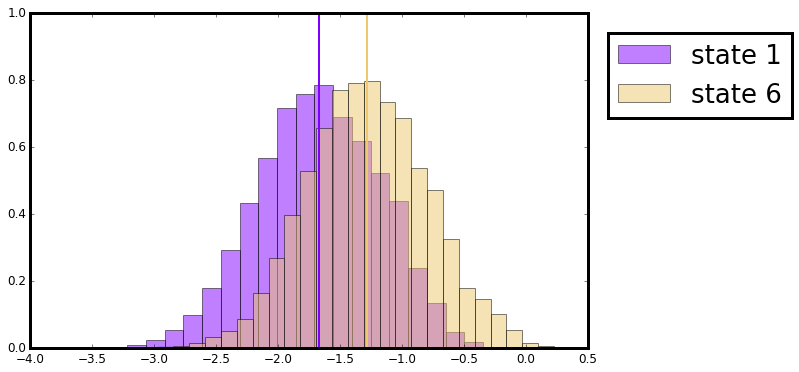

In [42]:
# everything by hand for Figs
feat_ind = 1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in [4,6]:#range(N_clust):
    label = 'state '+str(state_map_r[state_ind]+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_map_r[state_ind]], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [43]:
# everything by hand for Figs
feat_ind = 2
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in [4,6]:#range(N_clust):
    label = 'state '+str(state_map_r[state_ind]+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_map_r[state_ind]], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [34]:
# remove symmetrically identical states

In [35]:
microstates_renum2 = deepcopy(microstates_renum)
microstates_renum2[np.where(microstates_renum2==3)[0]] = 2
microstates_renum2[np.where(microstates_renum2==4)[0]] = 3
microstates_renum2[np.where(microstates_renum2==5)[0]] = 4
microstates_renum2[np.where(microstates_renum2==6)[0]] = 4

In [36]:
np.savetxt('microstates_renum2.dat',microstates_renum2.astype(int),fmt='%d')

In [37]:
for state in range(np.unique(microstates_renum2).shape[0]):
    print 'state '+str(state)+' has pop '+str(float(len(np.where(microstates_renum2==state)[0]))/len(microstates_renum2))

state 0 has pop 0.445411891393
state 1 has pop 0.136176704356
state 2 has pop 0.316514114299
state 3 has pop 0.0522575186524
state 4 has pop 0.0496397712996


In [38]:
N_clust = np.unique(microstates_renum2).shape[0]
feat_dist = [[] for state in range(N_clust)]
for state_ind,state in enumerate(np.unique(microstates_renum2)):
    state_frs = np.where(microstates_renum2==state)[0]
    for feat_ind in range(N_feat):
        feat_dist[state_ind].append(dtraj[state_frs,feat_ind])
feat_dist = np.array(feat_dist)

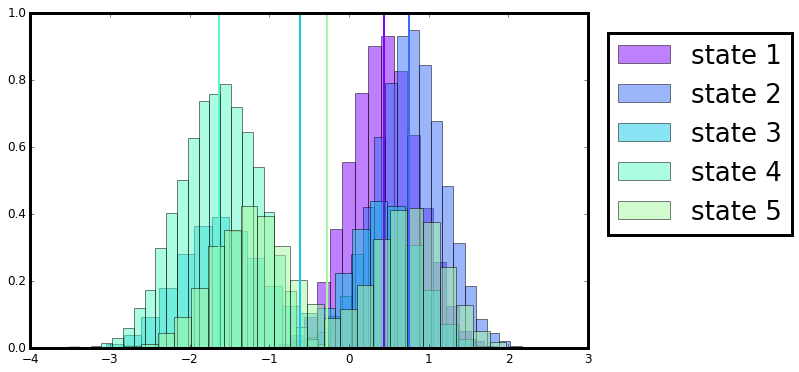

In [39]:
# everything by hand for Figs
feat_ind = 0
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [40]:
# everything by hand for Figs
feat_ind = 1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

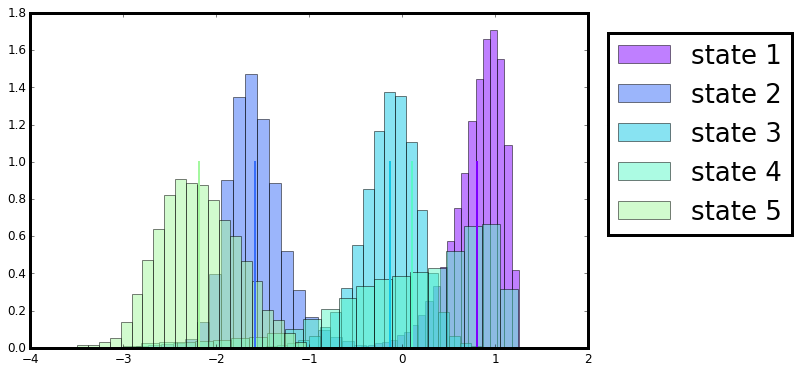

In [41]:
# everything by hand for Figs
feat_ind = 2
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,1.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [42]:
# Now, let's combine states directly from these definitions

In [43]:
state_pos = np.array(state_pos)

In [44]:
microstates_4states = deepcopy(microstates_renum2)
microstates_4states[np.where(microstates_4states==4)[0]] = 2
np.savetxt('microstates_4states.dat',microstates_4states.astype(int),fmt='%d')

In [45]:
microstates_3states = deepcopy(microstates_4states)
microstates_3states[np.where(microstates_3states==3)[0]] = 2
np.savetxt('microstates_3states.dat',microstates_3states.astype(int),fmt='%d')

In [46]:
microstates_2states = deepcopy(microstates_3states)
microstates_2states[np.where(microstates_2states==2)[0]] = 1
np.savetxt('microstates_2states.dat',microstates_2states.astype(int),fmt='%d')